In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
from scripts.utils import *
from scripts.models import *
import warnings
warnings.filterwarnings("ignore")
import cuml
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

/home/ubuntu/anaconda3/envs/rapids/lib/python3.8/site-packages/snowflake/connector/options.py:94: UserWarning: You have an incompatible version of 'pyarrow' installed (5.0.0), please install a version that adheres to: 'pyarrow<6.1.0,>=6.0.0; extra == "pandas"'
  warn_incompatible_dep(
2022-05-13 20:17:15.020478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 20:17:15.021053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 20:17:15.021262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# Table 1

### a. No morphology

In [38]:
table1a = np.load('results/table1a_ci.npy', allow_pickle=True).item()
print(table1a['upmc_exp'])
print(table1a['upmc_pred_labels'])

(0.4742758758657005, 0.0063013539593181345)
(0.6668960672385822, 0.001986175103584842)


### b. With morphology (main)

In [2]:
table1b = np.load('results/table1b_ci.npy', allow_pickle=True).item()
print(table1b['upmc_exp'])
print(table1b['upmc_pred_labels'])

(0.5343468565686813, 0.008785032745601995)
(0.726520815643912, 0.0016807695919546783)


### c. With morphology (alt)

In [48]:
table1c = np.load('results/table1c_ci.npy', allow_pickle=True).item()
print(table1c['upmc_exp'])
print(table1c['upmc_pred_labels'])

(0.5292055778695137, 0.007280301597425987)
(0.7391171832106525, 0.0018376724281763956)


## Figure 5 table

### a. CRC (Charville)

In [47]:
fig5a = np.load('results/fig5a_ci.npy', allow_pickle=True).item()
print(fig5a['char_exp_w_upmc'])
print(fig5a['char_labels_w_upmc'])
print(fig5a['char_exp'])
print(fig5a['char_pred_labels'])


(0.4893715797654845, 0.02359984322993794)
(0.613644556185174, 0.00395304580377126)
(0.5809374673109444, 0.03258206790168122)
(0.6053471216739016, 0.003577391887764292)


### b. HNC (CellSight)

In [44]:
fig5b = np.load('results/fig5b_ci.npy', allow_pickle=True).item()
print(fig5b['cshn_exp'])
print(fig5b['cshn_pred_labels'])
print(fig5b['cshn_exp_w_upmc'])
print(fig5b['cshn_labels_w_upmc'])


(0.5451644445037117, 0.004288038167079122)
(0.7729674002184145, 0.0005604338564862421)
(0.4746908571092288, 0.0045654685533403905)
(0.7567212772186681, 0.0005129163023950278)


## Supp Table 1

### reference

In [53]:
supptable1 = np.load('results/supptable1_ref_ci.npy', allow_pickle=True).item()
print(supptable1['upmc_exp'])
print(supptable1['upmc_pred_labels'])

(0.5225965918362031, 0.006353759324044805)
(0.7232649178685329, 0.0019836216707156407)


### 1a: context

In [49]:
supptable1a = np.load('results/supptable1a_ci.npy', allow_pickle=True).item()
print(supptable1a['upmc_exp'])
print(supptable1a['upmc_pred_labels'])

(0.5071118858946885, 0.0050048885238175855)
(0.7093933119046507, 0.0017884266409509686)


### 1b. single coverslip

In [51]:
supptable1b = np.load('results/supptable1b_ci.npy', allow_pickle=True).item()
print(supptable1b['upmc_exp'])
print(supptable1b['upmc_pred_labels'])

(0.4931410241699574, 0.00467957721036244)
(0.7151071963165848, 0.0019436144766663555)


## Visualizations

In [19]:
with_morph_df = pd.read_parquet('dfs/UPMC/morph_results_df.pqt')

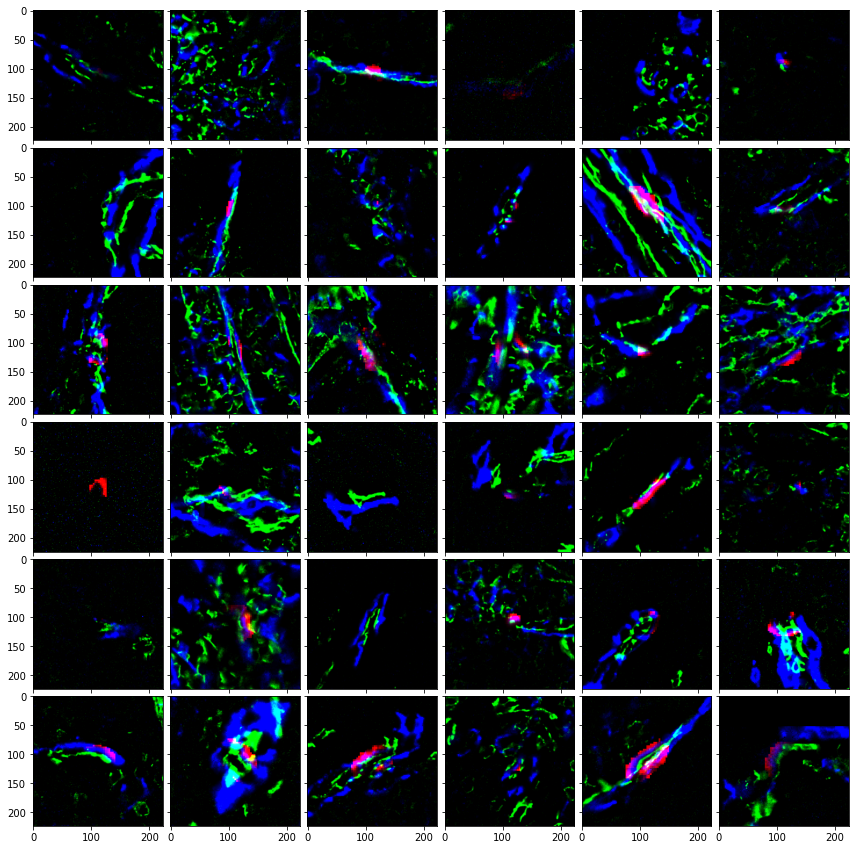

In [21]:
examples_df = with_morph_df[(with_morph_df['LABEL_NEW'] == 15) & (with_morph_df['PRED'] == 15) & (with_morph_df['NO_MORPH_PRED'] == 8)]
# vessel cells that are incorrectly classified as stromal cells
sample_df = examples_df.sample(36, replace=False)

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(6, 6),
                 axes_pad=0.1,
                 )
for ax, row in zip(grid, sample_df.iterrows()):
    i, row = row
    ax.imshow(imageio.imread(row['PATH'].format('UPMC', 'CD31', '0')))

## Visualize predictions

### Figure 2c

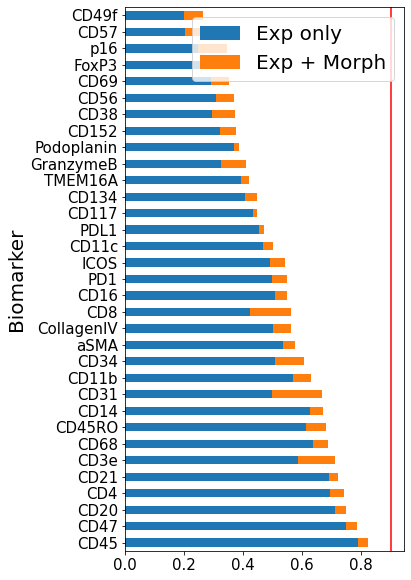

In [60]:
with_morph = np.load('results/table1b.npy', allow_pickle=True).item()['upmc_exp']
wo_morph = np.load('results/table1a.npy', allow_pickle=True).item()['upmc_exp']

with_morph['Exp + Morph'] = with_morph['R2']-wo_morph['R2']
with_morph['Exp only'] = wo_morph['R2']
with_morph['Total'] = with_morph['Exp only'] + with_morph['Exp + Morph']

bar = with_morph.sort_values(by="Total", ascending=False).plot.barh(x='Biomarker', y=['Exp only', 'Exp + Morph'], stacked=True,  fontsize=15, figsize=(5, 10))
# bar.get_children()[1].set_color(matplotlib.cm.tab20c(0))
# bar.get_children()[3].set_color(matplotlib.cm.tab20c(4))
# bar.get_children()[4].set_color(matplotlib.cm.tab20c(8))

plt.axvline(x=0.90, color='r', linestyle='-')
plt.legend(fontsize=20, loc='upper right')
plt.ylabel('Biomarker', fontsize=20)
# plt.savefig('bar.svg')
plt.show()

### Figure 3c

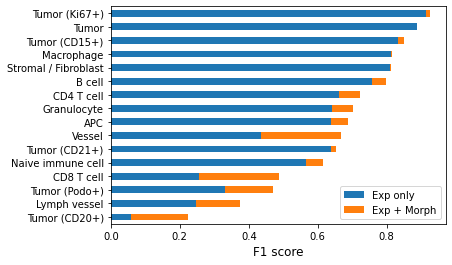

In [65]:
upmc_cell_labels = get_labels('upmc')
with_morph = np.load('results/table1b.npy', allow_pickle=True).item()['upmc_pred_labels']
wo_morph = np.load('results/table1a.npy', allow_pickle=True).item()['upmc_pred_labels']

df_ = pd.concat([wo_morph.loc[upmc_cell_labels], with_morph.loc[upmc_cell_labels]], axis=1)
df_.columns = ['Exp only', 'Exp + Morph']
df_['Exp + Morph'] = df_['Exp + Morph'] - df_['Exp only']
df_['Exp + Morph'] = df_['Exp + Morph'].apply(lambda x: 0 if x < 0 else x)
df_['Total'] = df_['Exp only'] + df_['Exp + Morph']
df_[['Exp only', 'Exp + Morph', 'Total']].sort_values(by='Total').plot.barh(y=['Exp only', 'Exp + Morph'], stacked=True, figsize=(6, 4))
plt.xlabel('F1 score', fontsize=12)
plt.show()


### Supp Figure 2

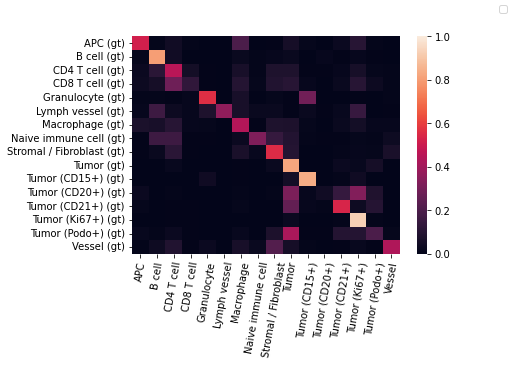

In [8]:
upmc_cell_labels = get_labels('upmc')
with_morph_df = pd.read_parquet('dfs/UPMC/morph_results_df.pqt')
true_mtx = sklearn.metrics.confusion_matrix(with_morph_df['LABEL'], with_morph_df['PRED'], normalize='true')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels)
sns.heatmap(true_mtx, ax=ax, xticklabels=upmc_cell_labels, yticklabels=[x+' (gt)' for x in upmc_cell_labels], vmin=0, vmax=1)
plt.xticks(rotation = 80)
plt.show()

### Supp Figure 4

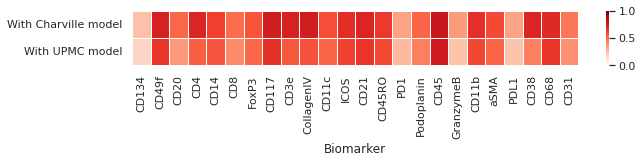

In [72]:
fig5a = np.load('results/fig5a.npy', allow_pickle=True).item()
df1 = fig5a['char_exp'].copy()
df2 = fig5a['char_exp_w_upmc'].copy()
df_ = df1.merge(df2, on='Biomarker')
df_ = df_.set_index('Biomarker')
df_ = df_.rename(columns={'R2_x':'With Charville model', 'R2_y':'With UPMC model'})
plt.title("")
sns.set(rc={'figure.figsize':(10, 1), 'axes.facecolor':'#ffffff', 'figure.facecolor':'#ffffff'})
ax = sns.heatmap(df_.T, linewidths=.5, vmin=0, vmax=1, cmap='Reds')
plt.show()

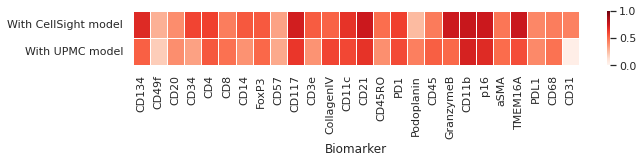

In [73]:
fig5b = np.load('results/fig5b.npy', allow_pickle=True).item()
df1 = fig5b['cshn_exp'].copy()
df2 = fig5b['cshn_exp_w_upmc'].copy()
df1 = fig5b['cshn_exp'].copy()
df2 = fig5b['cshn_exp_w_upmc'].copy()
df_ = df1.merge(df2, on='Biomarker')
df_ = df_.set_index('Biomarker')
df_ = df_.rename(columns={'R2_x':'With CellSight model', 'R2_y':'With UPMC model'})
sns.set(rc={'figure.figsize':(10, 1)})
ax = sns.heatmap(df_.T, linewidths=.5, vmin=0, vmax=1, cmap='Reds')